In [1]:
import numpy as np
import cv2
import os
import re

In [15]:
import keras.backend as K
from keras.models import Model
from keras.layers import Input, Conv2D, Activation, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import matplotlib.pyplot as plt

In [48]:
#Read in the data
data = np.load("../data/generator/generated_data.npy")
data_labels =np.load("../data/generator/generated_data_labels.npy")

In [49]:
#Change string labels to numeric
data_labels2 = np.zeros(data_labels.shape)

data_labels2[data_labels == "attack"] = 1
data_labels2[data_labels == "block"] = 2
data_labels2[data_labels == "counterattack"] = 3
data_labels2[data_labels == "cover"] = 4
data_labels2[data_labels == "delay"] = 5
data_labels2[data_labels == "destroy"] = 6
data_labels2[data_labels == "disrupt"] = 7
data_labels2[data_labels == "guard"] = 8
data_labels2[data_labels == "occupy"] = 9
data_labels2[data_labels == "retain"] = 10
data_labels2[data_labels == "screen"] = 11
data_labels2[data_labels == "secure"] = 12
data_labels2[data_labels == "seize"] = 13
data_labels2[data_labels == "support_by_fire"] = 14

In [50]:
#Change to binary.
data[data <= 140] = 1
data[data > 140] = 0

In [51]:
#Input_dim: (100x100)
#Hidden: Two CNN layers (both 50 filters with 9x9 window size) and one FC-layer (100 nodes)
#Output_dim: 15
x = Input(shape=(100,100,1))
c1 = Conv2D(50,(9,9),strides=(2,2), padding = "same")(x)
b1 = BatchNormalization()(c1)
a1 = Activation('relu')(b1)
c2 = Conv2D(50,(9,9),strides=(1,1), padding = "valid")(a1)
b2 = BatchNormalization()(c2)
a2 = Activation('relu')(b2)
d2 = Dropout(rate=0.25)(a2)
f2 = Flatten()(a2)
h3 = Dense(100)(f2)
b3 = BatchNormalization()(h3)
a3 = Activation('relu')(b3)
d3 = Dropout(rate=0.5)(a3)
z = Dense(15)(d3)
p = Activation('softmax')(z)

model = Model(inputs=x, outputs=p)
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0005), metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 50)        4100      
                                                                 
 batch_normalization_3 (Batc  (None, 50, 50, 50)       200       
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 50, 50, 50)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 42, 42, 50)        202550    
                                                                 
 batch_normalization_4 (Batc  (None, 42, 42, 50)       200       
 hNormalization)                                           

In [52]:
history = model.fit(data, data_labels2, batch_size=64, epochs=5, validation_split=0.05)

2105/2105 [==============================] - 1274s 605ms/step - loss: 0.5834 - accuracy: 0.7941 - val_loss: 0.4095 - val_accuracy: 0.8293


Text(0.5, 1.0, 'Accuracy')

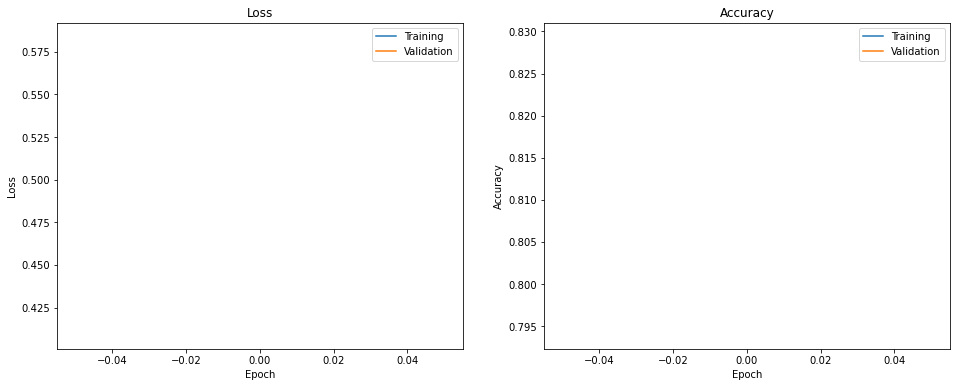

In [55]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')

In [56]:
# Save the model
model.save("nato_symbols.h5")

### Model on test set

In [57]:
from tensorflow import keras
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import cv2
import os
import re

In [69]:
model = keras.models.load_model('./nato_symbols.h5')

In [70]:
#Read in the test set
test_set = []
test_set_labels = []

In [71]:
#Test set 1
for filename in os.listdir("../data/test_data/"):
    img = cv2.imread("../data/test_data/" + filename,0)
    name = re.findall('([a-zA-Z_ ]*)\d*.*', filename)[0]
    img = img[np.argwhere(np.amin(img,axis=1) < 120)[0][0]:np.argwhere(np.amin(img,axis=1) < 120)[-1][0],:]
    img = img[:,np.argwhere(np.amin(img,axis=0) < 120)[0][0]:np.argwhere(np.amin(img,axis=0) < 120)[-1][0]]
    img = cv2.resize(img, [100,100])
    test_set.append(img)
    test_set_labels.append(name)

In [ ]:
#Test set 2
for filename in os.listdir("../data/symbols_test2/"):
    img = cv2.imread("../data/symbols_test2/" + filename,0)
    name = re.findall('([a-zA-Z_ ]*)\d*.*', filename)[0]
    img = img[np.argwhere(np.amin(img,axis=1) < 120)[0][0]:np.argwhere(np.amin(img,axis=1) < 120)[-1][0],:]
    img = img[:,np.argwhere(np.amin(img,axis=0) < 120)[0][0]:np.argwhere(np.amin(img,axis=0) < 120)[-1][0]]
    img = cv2.resize(img, [100,100])
    test_set.append(img)
    test_set_labels.append(name)

In [72]:
test = np.zeros((len(test_set),100,100))
for i in range(len(test_set)):
    test[i,:,:] = test_set[i]

In [77]:
#Change to binary
test[test <= 140] = 1
test[test > 140] = 0

In [ ]:
#Get numeric values of the test set labels

In [78]:
test_set_labels = np.array(test_set_labels)

In [79]:
test_labels = np.zeros(np.array(test_set_labels).shape)

test_labels[test_set_labels == "attack"] = 1
test_labels[test_set_labels == "block"] = 2
test_labels[test_set_labels == "counterattack"] = 3
test_labels[test_set_labels == "cover"] = 4
test_labels[test_set_labels == "delay"] = 5
test_labels[test_set_labels == "destroy"] = 6
test_labels[test_set_labels == "disrupt"] = 7
test_labels[test_set_labels == "guard"] = 8
test_labels[test_set_labels == "occupy"] = 9
test_labels[test_set_labels == "retain"] = 10
test_labels[test_set_labels == "screen"] = 11
test_labels[test_set_labels == "secure"] = 12
test_labels[test_set_labels == "seize"] = 13
test_labels[test_set_labels == "support_by_fire"] = 14

In [80]:
#Get the predictions
preds = model.predict(test)

In [81]:
correct = np.sum(np.abs(np.argmax(preds, axis=1)-test_labels) == 0)
print("Correct: " + str(correct))
print("Total: " + str(test.shape[0]))
print("Acc: " + str(correct/test.shape[0]))

Correct: 340
Total: 585
Acc: 0.5811965811965812


In [82]:
# Get the confusion matrix.
cm = confusion_matrix(test_labels, np.argmax(preds, axis=1))

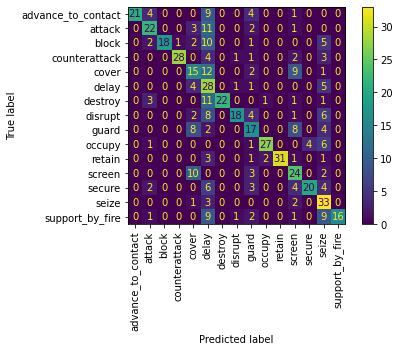

In [83]:
#Plot the confusion matrix.
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ["advance_to_contact",
                                                            "attack",
                                                            "block",
                                                            "counterattack",
                                                            "cover",
                                                            "delay",
                                                            "destroy",
                                                            "disrupt",
                                                            "guard",
                                                            "occupy",
                                                            "retain",
                                                            "screen",
                                                            "secure",
                                                            "seize",
                                                            "support_by_fire"])

disp.plot(xticks_rotation= "vertical")